In [1]:
from embiggen.node_prediction import GraphConvolutionalNeuralNetwork
from ensmallen_graph.datasets.linqs import Cora
from ensmallen_graph.datasets.linqs.parse_linqs import get_words_data
from plot_keras_history import plot_history
from tensorflow.keras import regularizers
import pandas as pd

In [10]:
cora = Cora()
features = get_words_data(cora)
cora = cora.filter_from_names(node_type_name_to_filter=['Word']).remove_edge_weights().remove_edge_types()
features = features.loc[cora.get_node_names()]
#cora = cora.generate_new_edges_from_node_features(features.values, neighbours_number=3, max_degree=3)
cora

Extracting words features:   0%|          | 0/4141 [00:00<?, ?it/s]

The undirected graph Cora has 2708 nodes and 5278 unweighted edges, of which none are self-loops. The graph is sparse as it has a density of 0.00144 and has 78 connected components, where the component with most nodes has 2485 nodes and the component with the least nodes has 2 nodes. The graph median node degree is 3, the mean node degree is 3.90, and the node degree mode is 2. The top 5 most central nodes are 35 (degree 168), 6213 (degree 78), 1365 (degree 74), 3229 (degree 65) and 910 (degree 44). The hash of the graph is 9982f2a4ae22d17d.

In [11]:
train, test = cora.node_label_holdout(0.8, use_stratification=True)

In [12]:
model = GraphConvolutionalNeuralNetwork(
    features.shape[1],
    cora.get_node_types_number(),
    nodes_number=cora.get_nodes_number(),
    number_of_hidden_layers=2,
    number_of_units_per_hidden_layer=128,
    #kernel_regularizer=regularizers.l1_l2(),
    #dropout_rate=0.8
)

In [13]:
model.summary()

Model: "GCN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(2708, 1433)]       0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(2708, 2708)]       0                                            
__________________________________________________________________________________________________
graph_convolution_6 (GraphConvo (None, 128)          183552      input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
graph_convolution_7 (GraphConvo (None, 7)            903         graph_convolution_6[0][0]      

0epoch [00:00, ?epoch/s]

(<Figure size 1440x720 with 8 Axes>,
 array([[<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
         <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>,
         <AxesSubplot:title={'center':'Recall'}, xlabel='Epochs', ylabel='Recall'>,
         <AxesSubplot:title={'center':'Precision'}, xlabel='Epochs', ylabel='Precision'>],
        [<AxesSubplot:title={'center':'AUROC'}, xlabel='Epochs', ylabel='AUROC'>,
         <AxesSubplot:title={'center':'AUPRC'}, xlabel='Epochs', ylabel='AUPRC'>,
         <AxesSubplot:title={'center':'Learning rate'}, xlabel='Epochs', ylabel='Learning rate'>,
         <AxesSubplot:>]], dtype=object))

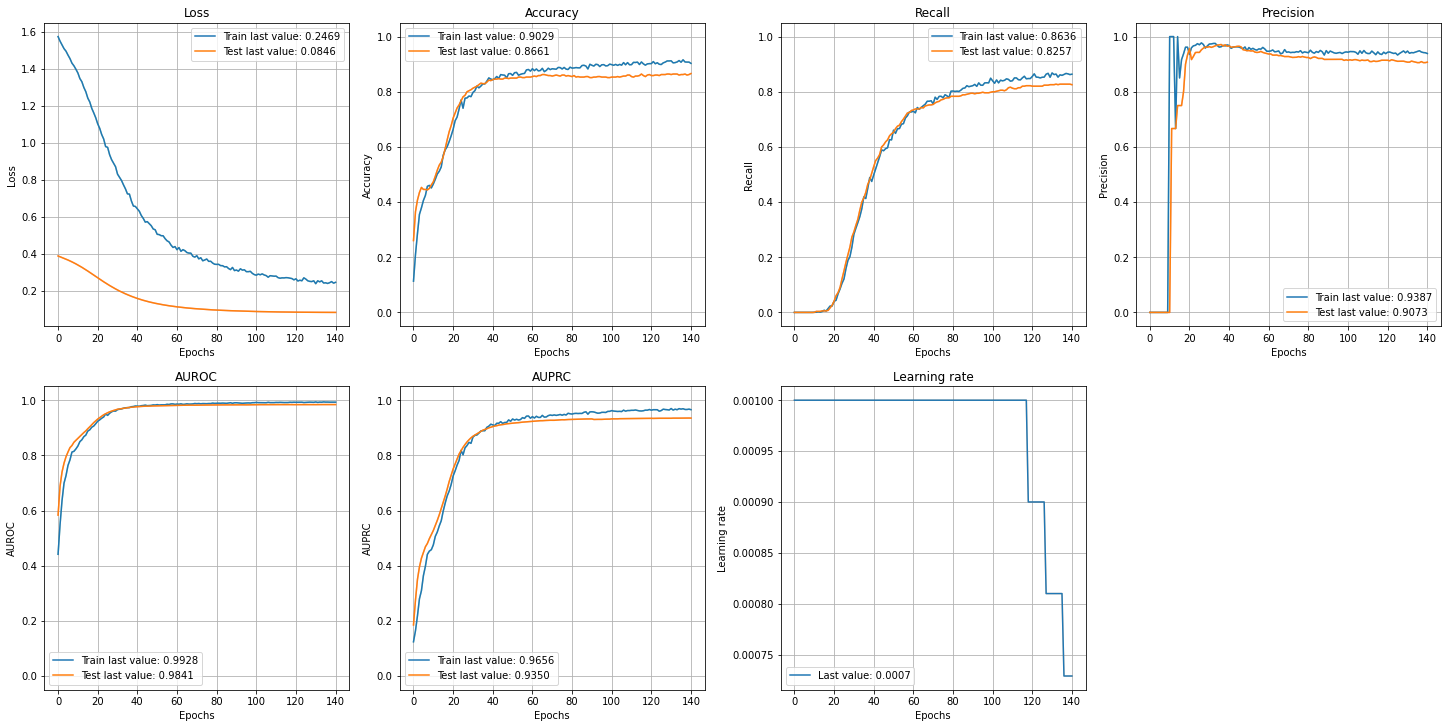

In [14]:
history = model.fit(
    train,
    features,
    validation_graph=test
)
plot_history(history)